**GROUP EXERCISE 2:**

Abhiraj Jagtap: 100002040
Reeve Gonsalves: 100003640

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Conv1D, MaxPooling1D, Flatten
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt


In [22]:
# Load and preprocess the dataset
data = pd.read_csv('/content/ObesityDataSet_raw_and_data.csv')

In [23]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [27]:
# Encode categorical variables
categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Encode the target variable
encoder = LabelEncoder()
data_encoded['NObeyesdad'] = encoder.fit_transform(data_encoded['NObeyesdad'])

# Separate features and target
X = data_encoded.drop('NObeyesdad', axis=1)
y = data_encoded['NObeyesdad']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
numerical_features = X_train.select_dtypes(include=np.number).columns
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Ensure data is converted to float32 for TensorFlow compatibility
X_train_rnn = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1).astype(np.float32)
X_test_rnn = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1).astype(np.float32)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2396 - loss: 1.9074 - val_accuracy: 0.3343 - val_loss: 1.6479
Epoch 2/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3447 - loss: 1.5724 - val_accuracy: 0.4527 - val_loss: 1.2908
Epoch 3/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5214 - loss: 1.2197 - val_accuracy: 0.5947 - val_loss: 0.9754
Epoch 4/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6364 - loss: 0.9665 - val_accuracy: 0.7751 - val_loss: 0.7360
Epoch 5/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8004 - loss: 0.7152 - val_accuracy: 0.8521 - val_loss: 0.5766
Epoch 6/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8405 - loss: 0.5619 - val_accuracy: 0.8550 - val_loss: 0.4758
Epoch 7/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8704 - loss: 0.4633 - val_accuracy: 0.8846 - val_loss: 0.4033
Epoch 8/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8938 - loss: 0.3842 - val_accuracy: 0.

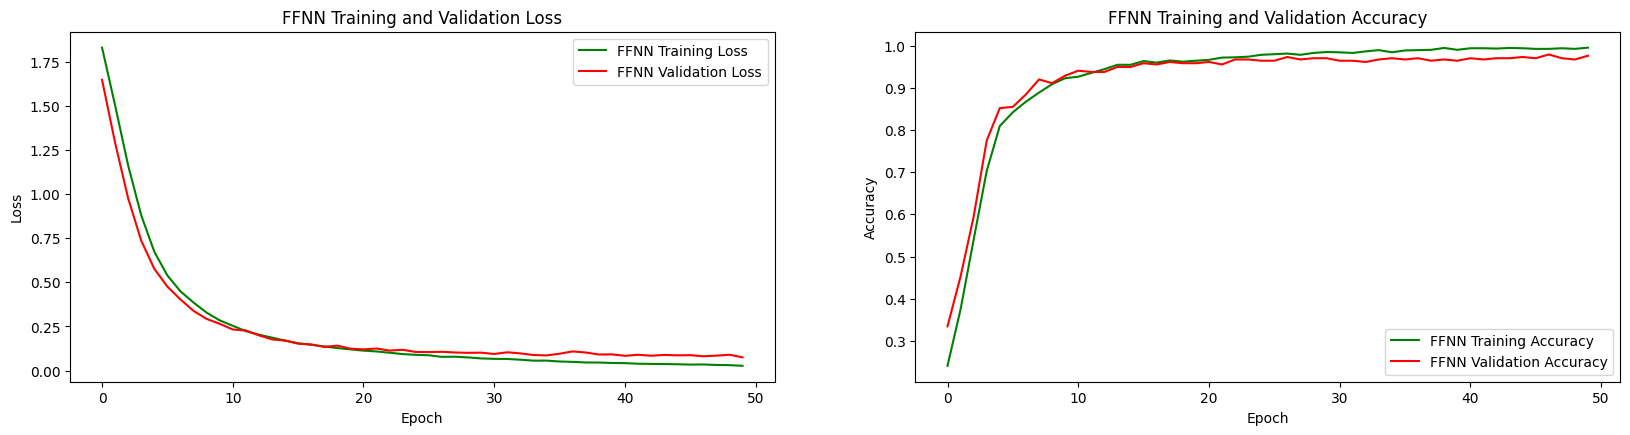

In [28]:
# Feedforward Neural Network (FFNN)
num_classes = len(np.unique(y))
model_ffnn = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model_ffnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_ffnn = model_ffnn.fit(X_train, y_train, epochs=50, batch_size=4, validation_split=0.2, verbose=1)

# Evaluate FFNN
ffnn_loss, ffnn_accuracy = model_ffnn.evaluate(X_test, y_test, verbose=0)
print(f"FFNN Test Accuracy: {ffnn_accuracy:.2f}")
print(f"FFNN Test Loss: {ffnn_loss:.2f}")

# Plotting the Visualization
plt.figure(figsize=(20, 10))

# FFNN
plt.subplot(2, 2, 1)
plt.plot(history_ffnn.history['loss'], label='FFNN Training Loss', color='green')
plt.plot(history_ffnn.history['val_loss'], label='FFNN Validation Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('FFNN Training and Validation Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(history_ffnn.history['accuracy'], label='FFNN Training Accuracy', color='green')
plt.plot(history_ffnn.history['val_accuracy'], label='FFNN Validation Accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('FFNN Training and Validation Accuracy')
plt.legend()

**Recurrent Neural Network (RNN)**

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


338/338 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.1592 - loss: 1.9398 - val_accuracy: 0.2899 - val_loss: 1.8928
Epoch 2/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.2614 - loss: 1.8905 - val_accuracy: 0.2633 - val_loss: 1.7925
Epoch 3/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3269 - loss: 1.7533 - val_accuracy: 0.3669 - val_loss: 1.5939
Epoch 4/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.3686 - loss: 1.6288 - val_accuracy: 0.4231 - val_loss: 1.4747
Epoch 5/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.4136 - loss: 1.4055 - val_accuracy: 0.4320 - val_loss: 1.2961
Epoch 6/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4503 - loss: 1.3340 - val_accuracy: 0.4615 - val_loss: 1.2866
Epoch 7/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4838 - loss: 1.2736 - val_accuracy: 0.5178 - val_loss: 1.2263
Epoch 8/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4751 - loss: 1.2569 - val_accuracy: 0.5444 - val

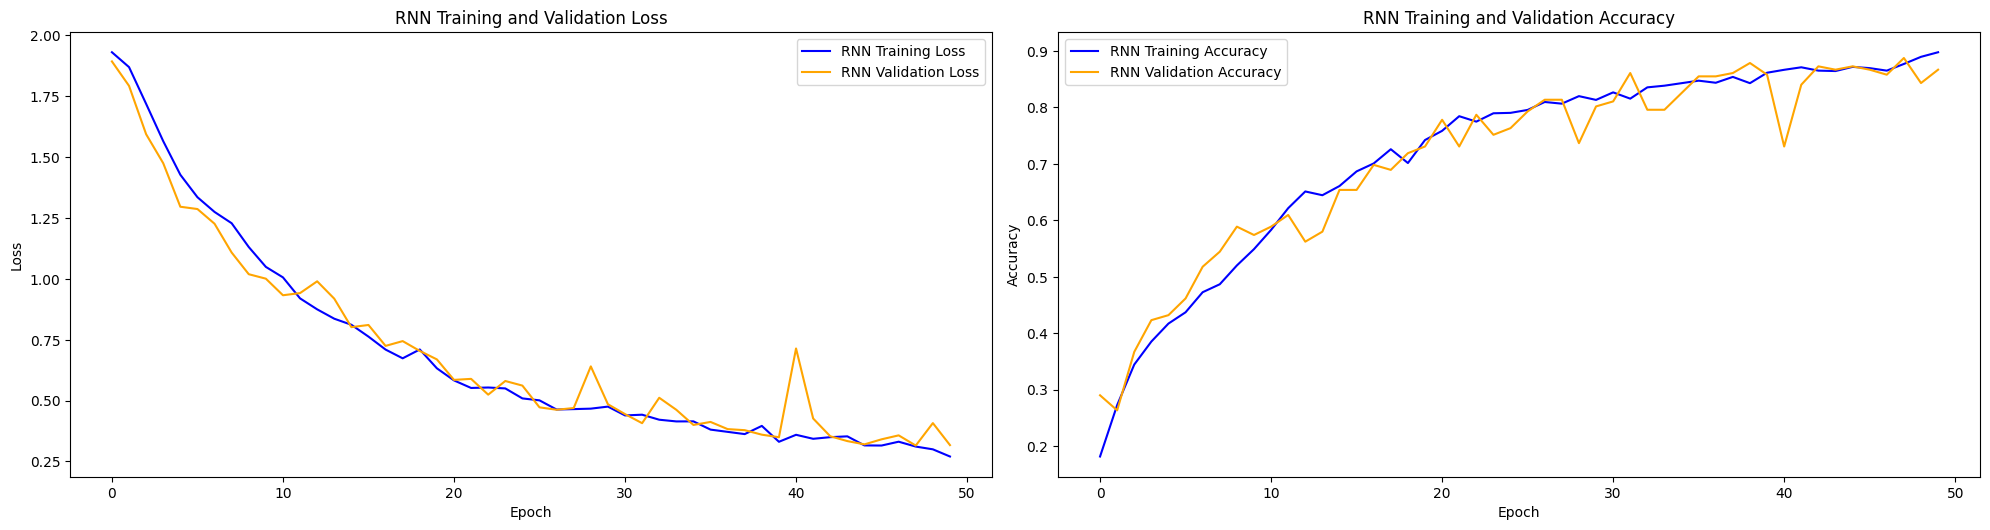

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

In [29]:
# Recurrent Neural Network (RNN)
model_rnn = Sequential([
    SimpleRNN(16, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dense(8, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model_rnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_rnn = model_rnn.fit(X_train_rnn, y_train, epochs=50, batch_size=4, validation_split=0.2, verbose=1)

# Evaluate RNN
rnn_loss, rnn_accuracy = model_rnn.evaluate(X_test_rnn, y_test, verbose=0)
print(f"RNN Test Accuracy: {rnn_accuracy:.2f}")
print(f"RNN Test Loss: {rnn_loss:.2f}")

# Plotting the Visualization
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 3)
plt.plot(history_rnn.history['loss'], label='RNN Training Loss', color='blue')
plt.plot(history_rnn.history['val_loss'], label='RNN Validation Loss', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('RNN Training and Validation Loss')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(history_rnn.history['accuracy'], label='RNN Training Accuracy', color='blue')
plt.plot(history_rnn.history['val_accuracy'], label='RNN Validation Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('RNN Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 10))

**Long Short-Term Memory (LSTM)**

Epoch 1/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.1478 - loss: 1.9871 - val_accuracy: 0.2308 - val_loss: 1.9326
Epoch 2/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.1848 - loss: 1.9368 - val_accuracy: 0.2219 - val_loss: 1.9223
Epoch 3/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2118 - loss: 1.9041 - val_accuracy: 0.2781 - val_loss: 1.8342
Epoch 4/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.2559 - loss: 1.8455 - val_accuracy: 0.2929 - val_loss: 1.7415
Epoch 5/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.2921 - loss: 1.7186 - val_accuracy: 0.2988 - val_loss: 1.6932
Epoch 6/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.2833 - loss: 1.6922 - val_accuracy: 0.3047 - val_loss: 1.6673
Epoch 7/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.2819 - loss: 1.6774 - val_accuracy: 0.3166 - val_loss: 1.6496
Epoch 8/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.2840 - loss: 1.6739 - val_accu

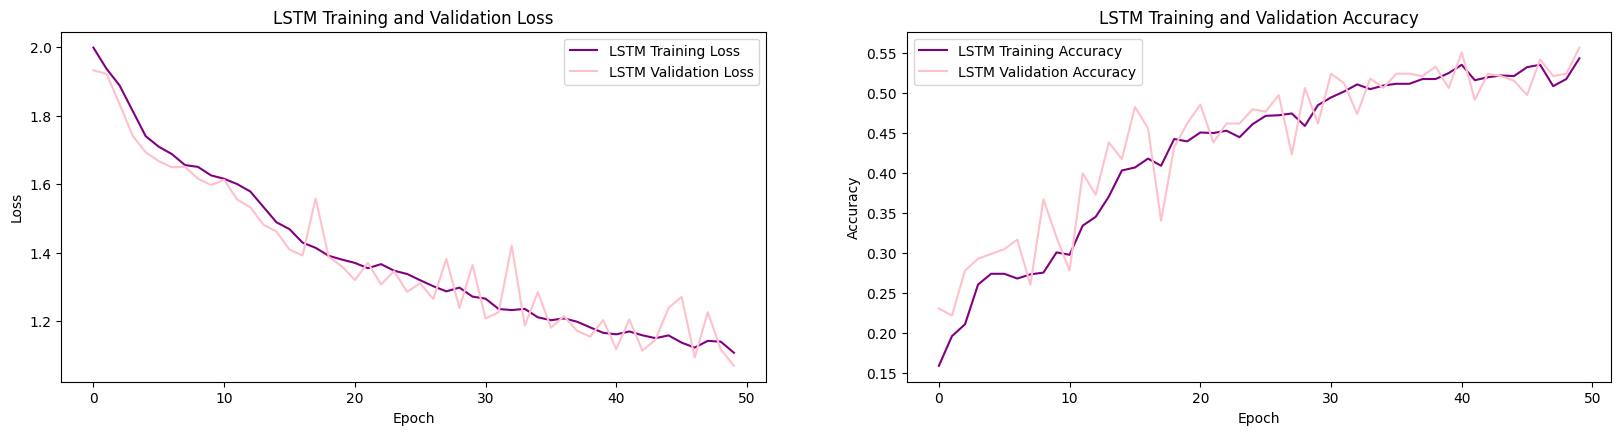

In [30]:
# LSTM
model_lstm = Sequential([
    LSTM(16, activation='relu', input_shape=(X_train.shape[1], 1)),
    Dense(8, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_lstm = model_lstm.fit(X_train_rnn, y_train, epochs=50, batch_size=4, validation_split=0.2, verbose=1)

# Evaluate LSTM
lstm_loss, lstm_accuracy = model_lstm.evaluate(X_test_rnn, y_test, verbose=0)
print(f"LSTM Test Accuracy: {lstm_accuracy:.2f}")
print(f"LSTM Test Loss: {lstm_loss:.2f}")


plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
plt.plot(history_lstm.history['loss'], label='LSTM Training Loss', color='purple')
plt.plot(history_lstm.history['val_loss'], label='LSTM Validation Loss', color='pink')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('LSTM Training and Validation Loss')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(history_lstm.history['accuracy'], label='LSTM Training Accuracy', color='purple')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM Validation Accuracy', color='pink')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('LSTM Training and Validation Accuracy')
plt.legend()

**Convolutional Neural Network (CNN)**

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1918 - loss: 1.9167 - val_accuracy: 0.3698 - val_loss: 1.6471
Epoch 2/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3361 - loss: 1.6213 - val_accuracy: 0.5237 - val_loss: 1.2650
Epoch 3/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5317 - loss: 1.2537 - val_accuracy: 0.6243 - val_loss: 0.9836
Epoch 4/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6248 - loss: 0.9916 - val_accuracy: 0.6361 - val_loss: 0.9131
Epoch 5/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6352 - loss: 0.8832 - val_accuracy: 0.6538 - val_loss: 0.8346
Epoch 6/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7124 - loss: 0.8093 - val_accuracy: 0.6834 - val_loss: 0.8048
Epoch 7/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7270 - loss: 0.7862 - val_accuracy: 0.6864 - val_loss: 0.7692
Epoch 8/50
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6976 - loss: 0.7613 - val_accuracy: 0.7012 - val_

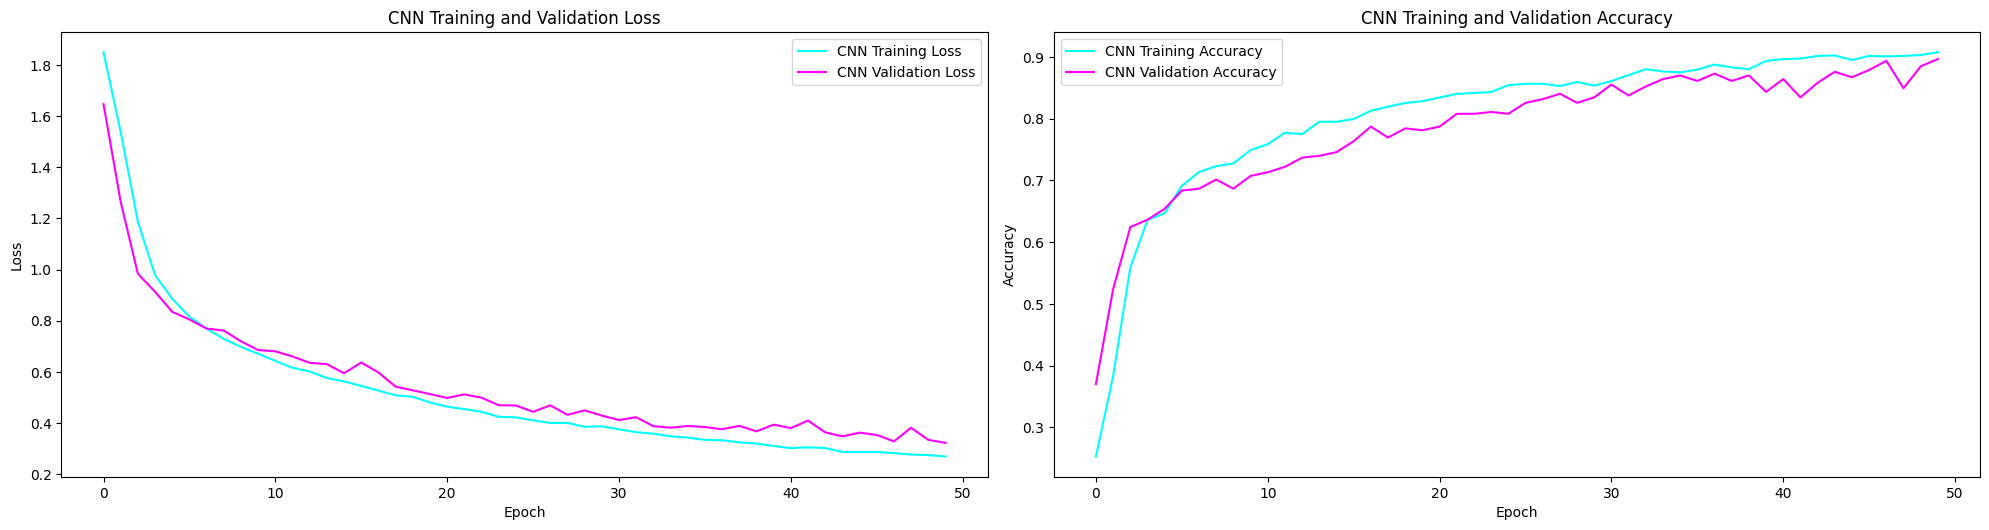

In [31]:
# Convolutional Neural Network (CNN)
X_train_cnn = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1).astype(np.float32)
X_test_cnn = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1).astype(np.float32)

model_cnn = Sequential([
    Conv1D(16, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(8, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_cnn = model_cnn.fit(X_train_cnn, y_train, epochs=50, batch_size=4, validation_split=0.2, verbose=1)

# Evaluate CNN
cnn_loss, cnn_accuracy = model_cnn.evaluate(X_test_cnn, y_test, verbose=0)
print(f"CNN Test Accuracy: {cnn_accuracy:.2f}")
print(f"CNN Test Loss: {cnn_loss:.2f}")

plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 3)
plt.plot(history_cnn.history['loss'], label='CNN Training Loss', color='cyan')
plt.plot(history_cnn.history['val_loss'], label='CNN Validation Loss', color='magenta')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('CNN Training and Validation Loss')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(history_cnn.history['accuracy'], label='CNN Training Accuracy', color='cyan')
plt.plot(history_cnn.history['val_accuracy'], label='CNN Validation Accuracy', color='magenta')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('CNN Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


The FFNN is the best-performing model for this dataset with 95% accuracy and the lowest test loss of 0.14.
This is justified by the dataset's structure, which is tabular and non-sequential. FFNNs are highly effective for structured data where no temporal or spatial relationships are required.

Strengths of FFNN:

Simplicity: Easy to implement and train, thus suitable for structured or tabular data.
Efficiency: Fast to train and computationally less expensive.
Feature Independence: Works perfectly when the features are independent of any time or space dependencies.
Scalability: Can scale up tasks simply by addition of layers and neurons.

Limitations of FFNN:

Lacks Context Awareness: Does not handle the data effectively that is either sequential or spatial in nature.
Preprocessing Dependency: Requires well-preprocessed and scaled data.
Risk of Overfitting: Without any regularization techniques, it might overfit on small datasets.